In [22]:
##Q7

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

bagging.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

y_pred_bag = bagging.predict(X_test)
y_pred_ada = adaboost.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("Report:\n", classification_report(y_true, y_pred, digits=4))

evaluate_model("Bagging Classifier", y_test, y_pred_bag)
evaluate_model("AdaBoost Classifier", y_test, y_pred_ada)



=== Bagging Classifier ===
Accuracy : 0.9415204678362573
Precision: 0.944954128440367
Recall   : 0.9626168224299065
Report:
               precision    recall  f1-score   support

           0     0.9355    0.9062    0.9206        64
           1     0.9450    0.9626    0.9537       107

    accuracy                         0.9415       171
   macro avg     0.9402    0.9344    0.9372       171
weighted avg     0.9414    0.9415    0.9413       171


=== AdaBoost Classifier ===
Accuracy : 0.9590643274853801
Precision: 0.9464285714285714
Recall   : 0.9906542056074766
Report:
               precision    recall  f1-score   support

           0     0.9831    0.9062    0.9431        64
           1     0.9464    0.9907    0.9680       107

    accuracy                         0.9591       171
   macro avg     0.9647    0.9485    0.9556       171
weighted avg     0.9601    0.9591    0.9587       171



Confusion Matrix:
 [[1328   15]
 [  53  104]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9616    0.9888    0.9750      1343
           1     0.8739    0.6624    0.7536       157

    accuracy                         0.9547      1500
   macro avg     0.9178    0.8256    0.8643      1500
weighted avg     0.9524    0.9547    0.9519      1500



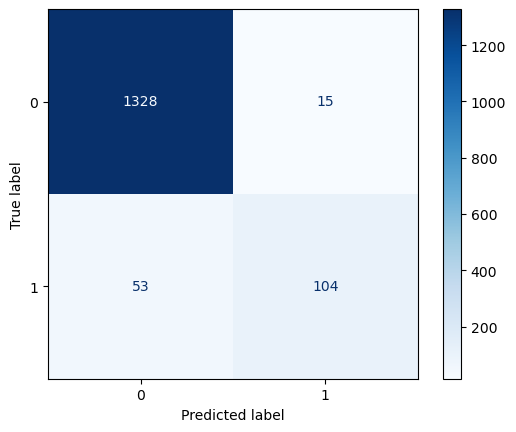

In [15]:
##Q8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
X, y = make_classification(n_samples=5000, n_features=20, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)


print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()


c:\Users\Vishakha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:43:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


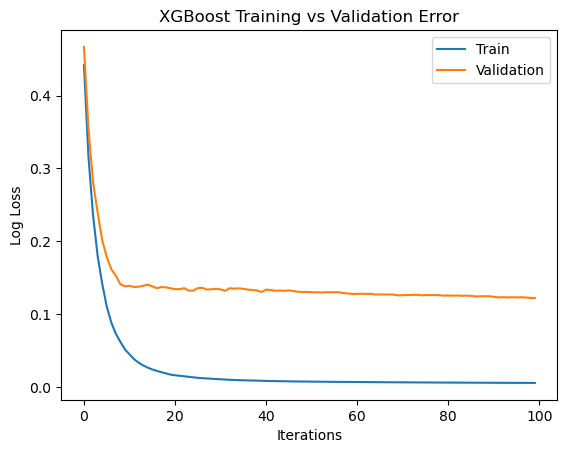

In [23]:
##Q9

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          verbose=False)

results = model.evals_result()
epochs = len(results['validation_0']['logloss'])

plt.plot(range(epochs), results['validation_0']['logloss'], label='Train')
plt.plot(range(epochs), results['validation_1']['logloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Validation Error')
plt.legend()
plt.show()


In [17]:
## 10

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, 'rf_model.pkl')

loaded_model = joblib.load('rf_model.pkl')
y_pred = loaded_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [18]:
##Q11

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("diabetes.csv")  # Use the downloaded file from Kaggle
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.7489177489177489


In [19]:
##Q18

class Vehicle:
    def __init__(self, brand, color):
        self.brand = brand
        self.color = color

    def display_info(self):
        print(f"Brand: {self.brand}, Color: {self.color}")

class Car(Vehicle):
    def __init__(self, brand, color, model):
        super().__init__(brand, color)
        self.model = model

    def display_info(self):
        super().display_info()
        print(f"Model: {self.model}")

c= Car("maruti", "white", "swift")
c.display_info()


Brand: maruti, Color: white
Model: swift


In [20]:
## Q19

class Student:
    def __init__(self, name, marks):
        self.name = name
        self.__marks = marks  # Private attribute

    def get_marks(self):
        return self.__marks

    def set_marks(self, marks):
        if 0 <= marks <= 100:
            self.__marks = marks
        else:
            print("Invalid marks. Must be between 0 and 100.")

# Example usage
s = Student("Alice", 85)
print(f"{s.name}'s marks:", s.get_marks())

s.set_marks(95)
print("Updated marks:", s.get_marks())

s.set_marks(150)  # Should show error


Alice's marks: 85
Updated marks: 95
Invalid marks. Must be between 0 and 100.


In [21]:
##Q21

class Father:
    def __init__(self, father_name, father_hobby):
        self.father_name = father_name
        self.father_hobby = father_hobby

class Mother:
    def __init__(self, mother_name, mother_hobby):
        self.mother_name = mother_name
        self.mother_hobby = mother_hobby

class Child(Father, Mother):
    def __init__(self, father_name, father_hobby, mother_name, mother_hobby, child_name):
        Father.__init__(self, father_name, father_hobby)
        Mother.__init__(self, mother_name, mother_hobby)
        self.child_name = child_name

    def display_family_info(self):
        print(f"Child: {self.child_name}")
        print(f"Father: {self.father_name}, Hobby: {self.father_hobby}")
        print(f"Mother: {self.mother_name}, Hobby: {self.mother_hobby}")

# Example usage
c = Child("John", "Fishing", "Emma", "Painting", "Lily")
c.display_family_info()


Child: Lily
Father: John, Hobby: Fishing
Mother: Emma, Hobby: Painting
